In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from openpyxl import load_workbook
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
df = pd.read_csv('../train_set.csv')
df = df.rename(columns={"Unnamed: 0": "index"}).set_index("index")
df.drop(['track_id', 'track_album_id', 'playlist_id'], axis = 1, inplace=True)

<IPython.core.display.Javascript object>

In [8]:
#matplotlib inline

In [2]:
from scipy.stats import normaltest

In [3]:
df.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [107]:
normaltest(df['track_popularity'])

NormaltestResult(statistic=976.3181636660495, pvalue=9.890186221278995e-213)

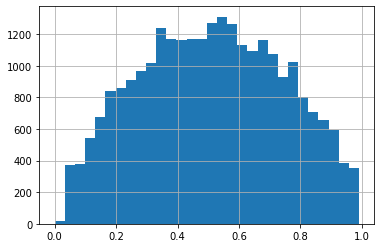

In [129]:
df['valence'].hist(bins = 30)

In [114]:
from sklearn.preprocessing import normalize, power_transform

<IPython.core.display.Javascript object>

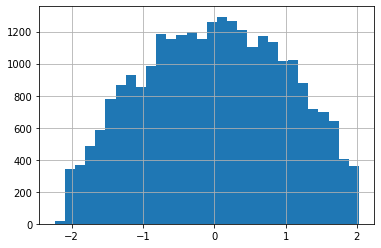

In [130]:
pd.DataFrame(power_transform(df[['track_popularity', 'valence', 'loudness']], method='yeo-johnson'), columns = ['track_popularity', 'valence', 'loudness'])['valence'].hist(bins = 30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

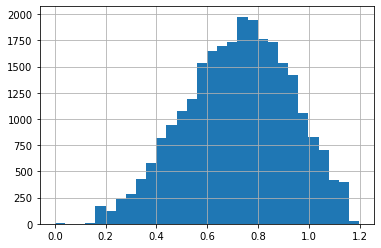

In [106]:
np.power(np.arcsin(df['valence']),.5).hist(bins = 30)

In [64]:
loud_log = np.log1p(df['track_popularity']/(1-df['track_popularity']))

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: overflow encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [0.0, inf] is not finite

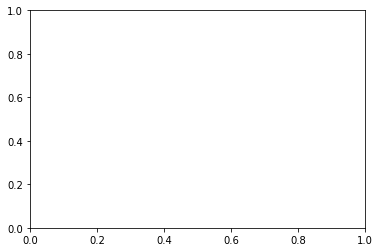

In [65]:
loud_log.hist(bins = 30)

In [58]:
df.loc[27716]

track_name                  Escape From Love - Curbi Remix
track_artist                                    Eva Simons
track_popularity                                         0
track_album_name            Escape From Love (The Remixes)
track_album_release_date                        2016-10-28
playlist_name                      Jeff Seid Electro House
playlist_genre                                         edm
playlist_subgenre                            electro house
danceability                                         0.725
energy                                               0.996
key                                                      0
loudness                                             1.135
mode                                                     1
speechiness                                         0.0877
acousticness                                         0.152
instrumentalness                                    0.0963
liveness                                             0.2

In [61]:
normaltest(loud_log[~loud_log.isna()])

NormaltestResult(statistic=262.10815026137846, pvalue=1.213216588365747e-57)

In [59]:
np.log1p(1.135/(1-1.135))

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

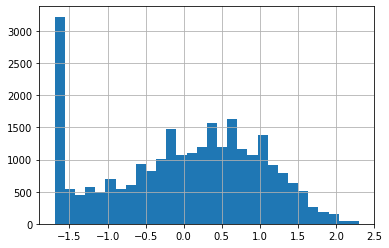

In [66]:
((df['track_popularity'] - np.mean(df['track_popularity']))/np.std(df['track_popularity'])).hist(bins = 30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

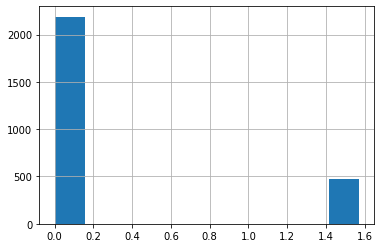

In [69]:
np.log1p(df['dance']).hist()